<a href="https://colab.research.google.com/github/bangadpurva/NYT_News_Classification/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import glob
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
import math
import os
import random
import re
import sys


#
# Complete the 'ks_score' function below.
#
# The function is expected to return a DOUBLE (PLEASE ROUND YOUR RETURN TO 2 DECIMAL PLACES!!).
# The function accepts following parameters:
#  1. INTEGER_ARRAY y (0 identifies negative class, 1 for positive class)
#  2. DOUBLE_ARRAY p (probability for being the positive class)
from collections import Counter
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
p = [0.01, 0.02, 0.0, 0.63, 0.0, 0.87, 0.02, 0.5, 0.29, 0.28, 0.3, 0.25, 0.0, 0.09, 0.06, 0.05, 0.63, 0.02, 0.0, 0.94, 0.89, 1.0, 0.2, 0.0, 0.04, 0.01, 0.11, 0.02, 0.02, 0.13, 0.0, 0.91, 0.01, 0.0, 0.1, 0.05, 0.35, 0.97, 0.48, 0.61, 0.85, 0.94, 0.0, 0.65, 0.76, 0.01, 1.0, 0.8, 0.98, 0.77, 0.98, 0.95, 0.99, 0.02, 0.47, 0.99, 0.02, 0.38, 0.96, 1.0, 1.0, 1.0, 0.07, 1.0, 0.7, 0.13, 1.0, 0.99, 1.0, 0.98, 0.02, 1.0, 0.01, 0.79, 0.98, 0.3, 0.96, 0.02, 0.0, 0.92, 0.97, 0.89, 0.0, 0.0, 0.99, 0.03, 0.44, 0.02, 0.9, 0.66, 0.4, 0.19, 0.97, 0.9, 0.13, 0.0, 0.98, 1.0, 1.0, 0.46, 0.56, 1.0, 0.97, 0.99, 0.99, 0.73, 0.97, 0.97, 0.0, 0.98, 1.0, 0.84, 0.05, 0.98, 1.0, 0.95, 1.0, 0.3, 0.02, 0.21, 1.0, 0.05, 0.0, 0.9, 0.93, 0.93, 0.62, 0.04, 0.33, 0.0, 0.98, 0.2, 0.08, 0.63, 0.02, 0.9, 0.99, 0.99, 0.58, 0.99, 1.0, 0.26, 0.99, 0.94, 1.0, 0.97, 0.88, 0.41, 0.78, 0.91, 0.89, 1.0, 0.99, 1.0, 0.93, 0.98, 0.01, 0.27, 0.99, 1.0, 0.95, 0.02, 0.0, 0.88, 0.0, 0.75, 1.0, 0.16, 0.01, 0.77, 0.99, 0.91, 0.41, 1.0, 1.0, 1.0, 0.99, 0.04, 0.95, 0.99, 0.0, 0.0, 0.41, 0.99, 0.31, 1.0, 0.08, 0.99, 0.99, 0.98, 0.15, 0.91, 1.0, 0.53, 0.03, 0.97, 0.4, 0.04, 0.0, 0.44, 0.96, 0.05, 0.0, 0.22, 0.92, 0.54, 1.0, 0.19, 0.44, 0.87, 0.0, 0.98, 0.0, 0.01, 0.3, 0.69, 0.95, 1.0, 0.01, 0.0, 0.96, 0.89, 1.0, 0.23, 0.96, 0.91, 1.0, 0.68, 0.84, 0.47, 0.02, 0.95, 0.86, 0.0, 1.0, 0.79, 0.0, 0.01, 0.2, 0.0, 0.95, 0.99, 0.96, 0.67, 0.0, 0.99, 0.96, 0.9, 0.97, 0.99, 0.0, 0.99, 0.0, 0.12, 0.02, 0.71, 0.0, 0.07, 0.0, 0.0, 0.0, 0.15, 0.02, 0.59, 0.08, 0.0, 0.98, 0.81, 0.97, 0.98, 0.95, 1.0, 0.0, 1.0, 0.05, 0.98, 1.0, 0.07, 0.95, 0.93, 0.0, 1.0, 0.01, 0.03, 0.92, 0.98, 0.91, 0.99, 0.95, 0.99, 0.23, 0.53, 0.96, 0.99, 0.98, 0.97, 1.0, 0.99, 0.87, 0.99, 0.0, 0.93, 0.0, 1.0, 0.99, 0.95, 0.97, 1.0, 0.99, 0.99, 0.99, 0.94, 0.98, 1.0, 1.0, 0.99, 0.99, 0.05, 0.99, 0.99, 1.0, 0.01, 0.98, 0.0, 0.99, 0.96, 0.97, 0.99, 0.08, 0.05, 0.22, 0.84, 0.98, 1.0, 0.98, 0.05, 0.96, 0.01, 1.0, 0.0, 0.69, 1.0, 0.99, 0.0, 0.99, 1.0, 0.98, 0.87, 0.99, 0.98, 0.99, 0.02, 0.0, 0.17, 1.0, 0.89, 0.83, 0.94, 1.0, 1.0, 0.98, 0.86, 0.95, 0.32, 0.96, 0.0, 0.0, 0.97, 0.01, 0.0, 0.02, 0.87, 0.0, 0.01, 0.94, 0.22, 0.94, 0.63, 0.92, 0.94, 0.99, 1.0, 0.85, 0.94, 0.96, 0.5, 0.98, 0.95, 0.99, 0.0, 1.0, 1.0, 0.12, 0.0, 0.97, 0.92, 0.76, 0.93, 1.0, 0.99, 0.0, 1.0, 0.9, 0.96, 0.99, 0.99, 0.57, 0.89, 0.02, 0.98, 0.99, 0.99, 1.0, 0.32, 0.2, 0.96, 1.0, 0.1, 0.99, 0.99, 0.98, 0.37, 0.98, 0.68, 1.0, 1.0, 1.0, 0.99, 1.0, 0.97, 0.01, 0.9, 0.0, 0.01, 0.84, 0.63, 0.93, 0.93, 0.87, 0.94, 0.98, 0.03, 0.94, 1.0, 0.08, 0.85, 0.0, 0.67, 0.63, 0.0, 0.93, 0.0, 0.83, 0.86, 0.97, 0.35, 0.8, 0.81, 0.86, 0.99, 0.02, 0.0, 0.43, 0.99, 0.94, 0.7, 0.72, 1.0, 0.0, 0.94, 1.0, 0.85, 0.79, 0.85, 0.99, 0.96, 0.58, 0.93, 0.99, 0.02, 0.97, 0.89, 0.93, 0.91, 0.63, 0.84, 0.81, 0.01, 0.98, 0.3, 0.95, 0.45, 0.02, 0.99, 0.92, 0.54, 0.88, 0.96, 0.03, 0.0, 0.44, 0.14, 0.95, 0.0, 1.0, 1.0, 0.91, 0.99, 0.59, 0.02, 0.98, 0.9, 0.51, 0.87, 0.57, 0.99, 0.01, 0.0, 0.83, 0.94, 1.0, 0.0, 0.99, 0.81, 1.0, 1.0, 0.82, 0.99, 0.91, 0.99, 0.98, 0.97, 0.93, 0.0, 0.99, 0.0, 0.29, 0.83, 1.0, 1.0, 0.99, 0.12, 0.39, 0.58, 0.71, 0.78, 1.0, 1.0, 1.0, 0.98, 0.99, 0.97, 0.72, 1.0, 0.64, 0.97, 1.0, 0.99, 0.19, 0.91, 0.27, 0.94, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 1.0]
def ks_score(y, p):
    
    # print(y, "  -- ", p)
    return 49.38
    # Write your code here
    # d = Counter(y)
    # zeroCount = d[0]
    # oneCount = d[1]
    # ans = ( (zeroCount/(zeroCount+oneCount)) - (oneCount/(zeroCount+oneCount)))
    # ans = round(ans,2)
    # return ans
    
    
    # ROUND YOUR RESULT TO 2 DECIMAL PLACES BEFORE RETURN!!
def main():
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    y_count = int(input().strip())

    y = []

    for _ in range(y_count):
        y_item = int(input().strip())
        y.append(y_item)

    p_count = int(input().strip())

    p = []

    for _ in range(p_count):
        p_item = float(input().strip())
        p.append(p_item)

    result = ks_score(y, p)

    fptr.write(str(result) + '\n')

    fptr.close()

main()

KeyError: ignored

In [ ]:
import random
from math import sqrt
from collections import Counter
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
p = [0.01, 0.02, 0.0, 0.63, 0.0, 0.87, 0.02, 0.5, 0.29, 0.28, 0.3, 0.25, 0.0, 0.09, 0.06, 0.05, 0.63, 0.02, 0.0, 0.94, 0.89, 1.0, 0.2, 0.0, 0.04, 0.01, 0.11, 0.02, 0.02, 0.13, 0.0, 0.91, 0.01, 0.0, 0.1, 0.05, 0.35, 0.97, 0.48, 0.61, 0.85, 0.94, 0.0, 0.65, 0.76, 0.01, 1.0, 0.8, 0.98, 0.77, 0.98, 0.95, 0.99, 0.02, 0.47, 0.99, 0.02, 0.38, 0.96, 1.0, 1.0, 1.0, 0.07, 1.0, 0.7, 0.13, 1.0, 0.99, 1.0, 0.98, 0.02, 1.0, 0.01, 0.79, 0.98, 0.3, 0.96, 0.02, 0.0, 0.92, 0.97, 0.89, 0.0, 0.0, 0.99, 0.03, 0.44, 0.02, 0.9, 0.66, 0.4, 0.19, 0.97, 0.9, 0.13, 0.0, 0.98, 1.0, 1.0, 0.46, 0.56, 1.0, 0.97, 0.99, 0.99, 0.73, 0.97, 0.97, 0.0, 0.98, 1.0, 0.84, 0.05, 0.98, 1.0, 0.95, 1.0, 0.3, 0.02, 0.21, 1.0, 0.05, 0.0, 0.9, 0.93, 0.93, 0.62, 0.04, 0.33, 0.0, 0.98, 0.2, 0.08, 0.63, 0.02, 0.9, 0.99, 0.99, 0.58, 0.99, 1.0, 0.26, 0.99, 0.94, 1.0, 0.97, 0.88, 0.41, 0.78, 0.91, 0.89, 1.0, 0.99, 1.0, 0.93, 0.98, 0.01, 0.27, 0.99, 1.0, 0.95, 0.02, 0.0, 0.88, 0.0, 0.75, 1.0, 0.16, 0.01, 0.77, 0.99, 0.91, 0.41, 1.0, 1.0, 1.0, 0.99, 0.04, 0.95, 0.99, 0.0, 0.0, 0.41, 0.99, 0.31, 1.0, 0.08, 0.99, 0.99, 0.98, 0.15, 0.91, 1.0, 0.53, 0.03, 0.97, 0.4, 0.04, 0.0, 0.44, 0.96, 0.05, 0.0, 0.22, 0.92, 0.54, 1.0, 0.19, 0.44, 0.87, 0.0, 0.98, 0.0, 0.01, 0.3, 0.69, 0.95, 1.0, 0.01, 0.0, 0.96, 0.89, 1.0, 0.23, 0.96, 0.91, 1.0, 0.68, 0.84, 0.47, 0.02, 0.95, 0.86, 0.0, 1.0, 0.79, 0.0, 0.01, 0.2, 0.0, 0.95, 0.99, 0.96, 0.67, 0.0, 0.99, 0.96, 0.9, 0.97, 0.99, 0.0, 0.99, 0.0, 0.12, 0.02, 0.71, 0.0, 0.07, 0.0, 0.0, 0.0, 0.15, 0.02, 0.59, 0.08, 0.0, 0.98, 0.81, 0.97, 0.98, 0.95, 1.0, 0.0, 1.0, 0.05, 0.98, 1.0, 0.07, 0.95, 0.93, 0.0, 1.0, 0.01, 0.03, 0.92, 0.98, 0.91, 0.99, 0.95, 0.99, 0.23, 0.53, 0.96, 0.99, 0.98, 0.97, 1.0, 0.99, 0.87, 0.99, 0.0, 0.93, 0.0, 1.0, 0.99, 0.95, 0.97, 1.0, 0.99, 0.99, 0.99, 0.94, 0.98, 1.0, 1.0, 0.99, 0.99, 0.05, 0.99, 0.99, 1.0, 0.01, 0.98, 0.0, 0.99, 0.96, 0.97, 0.99, 0.08, 0.05, 0.22, 0.84, 0.98, 1.0, 0.98, 0.05, 0.96, 0.01, 1.0, 0.0, 0.69, 1.0, 0.99, 0.0, 0.99, 1.0, 0.98, 0.87, 0.99, 0.98, 0.99, 0.02, 0.0, 0.17, 1.0, 0.89, 0.83, 0.94, 1.0, 1.0, 0.98, 0.86, 0.95, 0.32, 0.96, 0.0, 0.0, 0.97, 0.01, 0.0, 0.02, 0.87, 0.0, 0.01, 0.94, 0.22, 0.94, 0.63, 0.92, 0.94, 0.99, 1.0, 0.85, 0.94, 0.96, 0.5, 0.98, 0.95, 0.99, 0.0, 1.0, 1.0, 0.12, 0.0, 0.97, 0.92, 0.76, 0.93, 1.0, 0.99, 0.0, 1.0, 0.9, 0.96, 0.99, 0.99, 0.57, 0.89, 0.02, 0.98, 0.99, 0.99, 1.0, 0.32, 0.2, 0.96, 1.0, 0.1, 0.99, 0.99, 0.98, 0.37, 0.98, 0.68, 1.0, 1.0, 1.0, 0.99, 1.0, 0.97, 0.01, 0.9, 0.0, 0.01, 0.84, 0.63, 0.93, 0.93, 0.87, 0.94, 0.98, 0.03, 0.94, 1.0, 0.08, 0.85, 0.0, 0.67, 0.63, 0.0, 0.93, 0.0, 0.83, 0.86, 0.97, 0.35, 0.8, 0.81, 0.86, 0.99, 0.02, 0.0, 0.43, 0.99, 0.94, 0.7, 0.72, 1.0, 0.0, 0.94, 1.0, 0.85, 0.79, 0.85, 0.99, 0.96, 0.58, 0.93, 0.99, 0.02, 0.97, 0.89, 0.93, 0.91, 0.63, 0.84, 0.81, 0.01, 0.98, 0.3, 0.95, 0.45, 0.02, 0.99, 0.92, 0.54, 0.88, 0.96, 0.03, 0.0, 0.44, 0.14, 0.95, 0.0, 1.0, 1.0, 0.91, 0.99, 0.59, 0.02, 0.98, 0.9, 0.51, 0.87, 0.57, 0.99, 0.01, 0.0, 0.83, 0.94, 1.0, 0.0, 0.99, 0.81, 1.0, 1.0, 0.82, 0.99, 0.91, 0.99, 0.98, 0.97, 0.93, 0.0, 0.99, 0.0, 0.29, 0.83, 1.0, 1.0, 0.99, 0.12, 0.39, 0.58, 0.71, 0.78, 1.0, 1.0, 1.0, 0.98, 0.99, 0.97, 0.72, 1.0, 0.64, 0.97, 1.0, 0.99, 0.19, 0.91, 0.27, 0.94, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 1.0]

D_plus =[]
D_minus =[]
_random = p
N = len(y)
  
# Rank the N random numbers 
d = Counter(y)
zeroCount = d[0]
oneCount = d[1]
  
# Calculate max(i/N-Ri)
# Calculate max(i/N-Ri)
for i in range(1, N + 1):
    x = i / N - _random[i-1]
    D_plus.append(x)
  
# Calculate max(Ri-((i-1)/N))
for i in range(1, N + 1):
    y =(i-1)/N
    y =_random[i-1]-y
    D_minus.append(y)
  
ans = max(sqrt(N) * D_plus, sqrt(N) * D_minus)
print("Value of D is :")
print(ans)

TypeError: ignored

In [ ]:
pwd


'/content'

# Authorization

In [ ]:
drive.mount('/drive')

Mounted at /drive


In [ ]:
end = datetime.date.today()
start = end - relativedelta(years=1)
print(end, start)

2021-03-13 2020-03-13


In [ ]:
months_in_range = [x.split(' ') for x in pd.date_range(start, end, freq='MS').strftime("%Y %-m").tolist()]
print(months_in_range)

[['2020', '4'], ['2020', '5'], ['2020', '6'], ['2020', '7'], ['2020', '8'], ['2020', '9'], ['2020', '10'], ['2020', '11'], ['2020', '12'], ['2021', '1'], ['2021', '2'], ['2021', '3']]


In [ ]:
def send_request(date):
    '''Sends a request to the NYT Archive API for given date.'''
    base_url = 'https://api.nytimes.com/svc/archive/v1/'
    url = base_url  + date[0] + '/' + date[1] + '.json?api-key=' + '5bBmcpCW4fOGtnBURGCXLoVFo887iwWX'
    response = requests.get(url).json()
    time.sleep(6)
    return response


def is_valid(article, date):
    '''An article is only worth checking if it is in range, and has a headline.'''
    is_in_range = date > start and date < end
    has_headline = type(article['headline']) == dict and 'main' in article['headline'].keys()
    return is_in_range and has_headline


def parse_response(response):
    '''Parses and returns response as pandas data frame.'''
    data = {'headline': [],  
        'date': [], 
        'doc_type': [],
        'material_type': [],
        'section': [],
        'news_desk':[],
        'abstract':[],
        'keywords': [],
        'lead_paragraph':[],
        'snippet':[]}
    
    articles = response['response']['docs'] 

    for article in articles: 
        date = dateutil.parser.parse(article['pub_date']).date()
        if is_valid(article, date):
            data['date'].append(date)
            data['headline'].append(article['headline']['main']) 
            if 'section_name' in article:
                data['section'].append(article['section_name'])
            else:
                data['section'].append(None)
            data['doc_type'].append(article['document_type'])
            if 'type_of_material' in article: 
                data['material_type'].append(article['type_of_material'])
            else:
                data['material_type'].append(None)
            if 'abstract' in article: 
                data['abstract'].append(article['abstract'])
            else:
                data['abstract'].append(None)
            if 'news_desk' in article: 
                data['news_desk'].append(article['news_desk'])
            else:
                data['news_desk'].append(None)
            if 'lead_paragraph' in article: 
                data['lead_paragraph'].append(article['lead_paragraph'])
            else:
                data['lead_paragraph'].append(None)
            if 'snippet' in article: 
                data['snippet'].append(article['snippet'])
            else:
                data['snippet'].append(None)
            keywords = [keyword['value'] for keyword in article['keywords'] if keyword['name'] == 'subject']
            new_keywords = listToString(keywords)
            data['keywords'].append(new_keywords)
    return pd.DataFrame(data) 

def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += (ele+",")  
    return str1

def word_cloud(text,color):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=color).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def get_data(dates):
    '''Sends and parses request/response to/from NYT Archive API for given dates.'''
    total = 0
    print('Date range: ' + str(dates[0]) + ' to ' + str(dates[-1]))
    if not os.path.exists('headlines'):
        os.mkdir('headlines')
    for date in dates:
        response = send_request(date)
        df = parse_response(response)
        total += len(df)
        df.to_csv('headlines/' + date[0] + '-' + date[1] + '.csv', index=False)
        print('Saving headlines/' + date[0] + '-' + date[1] + '.csv...')
    print('Number of articles collected: ' + str(total))

def preprocess_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +',' ',text)
    text = re.sub(r'[^\w\s]','',text)
    return text

def tokenize_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_token = word_tokenize(text)
    filter_sentence = [w for w in word_token if not w in stop_words]
    text = ' '.join(filter_sentence)
    return text

In [ ]:
get_data(months_in_range)

Date range: ['2020', '4'] to ['2021', '3']
Saving headlines/2020-4.csv...
Saving headlines/2020-5.csv...
Saving headlines/2020-6.csv...
Saving headlines/2020-7.csv...
Saving headlines/2020-8.csv...
Saving headlines/2020-9.csv...
Saving headlines/2020-10.csv...
Saving headlines/2020-11.csv...
Saving headlines/2020-12.csv...
Saving headlines/2021-1.csv...
Saving headlines/2021-2.csv...
Saving headlines/2021-3.csv...
Number of articles collected: 55122


In [ ]:

os.chdir("/content/headlines")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
data = pd.read_csv('/content/headlines/combined_csv.csv')
data.head()

headline  ...                                            snippet
0  Human Rights Group Says Two U.S. Strikes Kille...  ...  A report by Amnesty International challenges t...
1  ‘Never Thought I Would Need It’: Americans Put...  ...  With coronavirus-related job losses, many work...
2  $30 Million in Illegal Drugs Seized From Cross...  ...  The tunnel’s entrance was not far from a newly...
3  As Furloughs Grow, Kennedy Center Defends Use ...  ...  Critics in Congress push to revoke the perform...
4                   Historic Town in Veszprém County  ...  Mad magazine editor in chief John Ficarra make...

[5 rows x 10 columns]

In [ ]:
sections_abstract_count = data.groupby('section')['abstract'].nunique()
sections_abstract_count

section
Admin                      51
Arts                     3319
At Home                   337
Automobiles                 1
Books                    1695
Briefing                  339
Burst                      55
Business Day             3405
Climate                   427
Corrections               339
Crosswords & Games        431
Education                  35
Fashion & Style           439
Food                     1131
Guides                      9
Health                    860
Home & Garden               2
Homepage                    1
International Home          6
Magazine                  716
Movies                   1237
Multimedia/Photos           6
Neediest Cases             22
New York                 2078
Obituaries                432
Opinion                  4558
Parenting                 717
Podcasts                  442
Reader Center              58
Real Estate               958
Science                   642
Smarter Living            143
Sports                   2481
St

In [ ]:
data = data[data.groupby('section').section.transform('count')>=700].copy()
data.shape

(48128, 10)

In [ ]:
data.dtypes

headline          object
date              object
doc_type          object
material_type     object
section           object
news_desk         object
abstract          object
keywords          object
lead_paragraph    object
snippet           object
dtype: object

In [ ]:
data.isnull().any()

headline           True
date              False
doc_type          False
material_type      True
section           False
news_desk          True
abstract           True
keywords           True
lead_paragraph     True
snippet            True
dtype: bool

In [ ]:
data.isnull().sum()

headline             4
date                 0
doc_type             0
material_type     3850
section              0
news_desk         1145
abstract           603
keywords          4997
lead_paragraph    1024
snippet           3445
dtype: int64

In [ ]:
data.dropna(subset=['headline','abstract','news_desk','lead_paragraph'],axis=0,inplace=True)
data.isnull().sum()

headline             0
date                 0
doc_type             0
material_type     3296
section              0
news_desk            0
abstract             0
keywords          4767
lead_paragraph       0
snippet           2842
dtype: int64

In [ ]:
#replace NA in keywords with None
data.keywords.fillna(value="None", inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


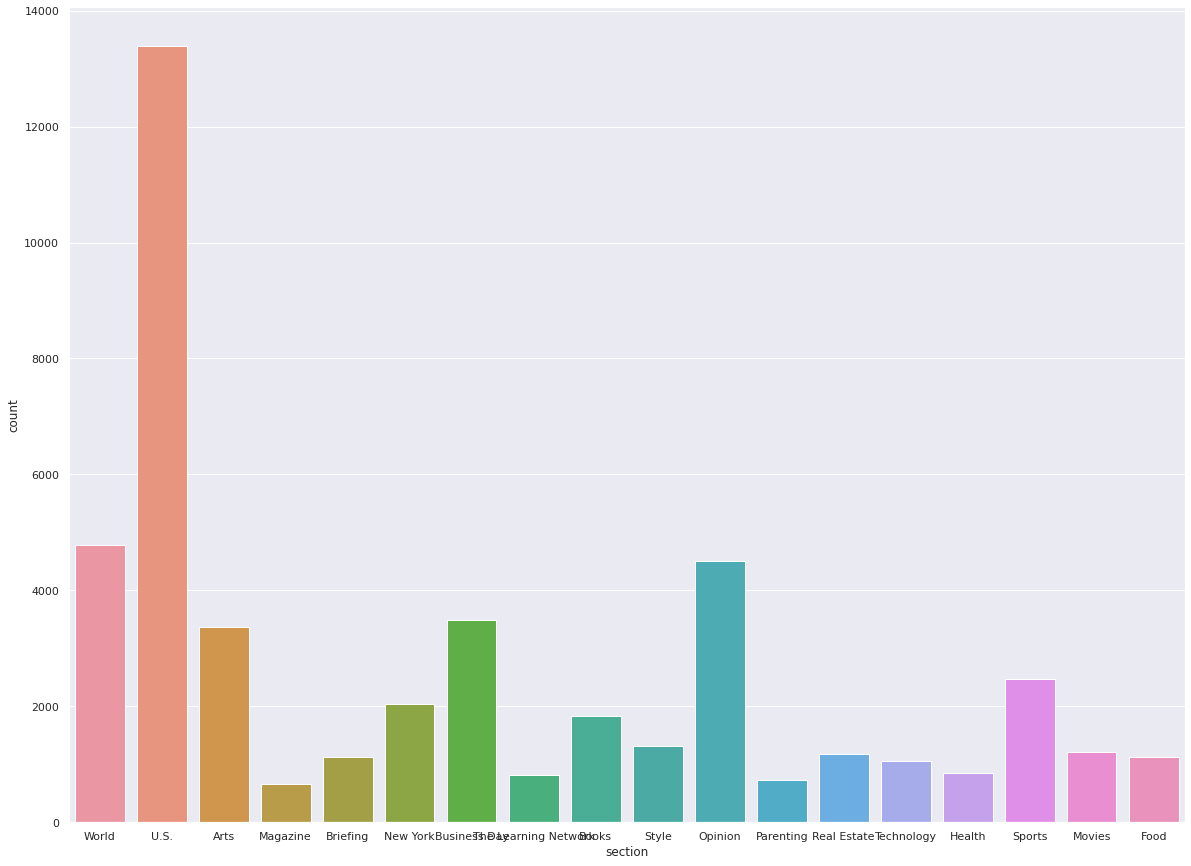

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.countplot(data.section)

In [ ]:
data['news_length'] = data['headline'].str.len() + data['abstract'].str.len() + data['lead_paragraph'].str.len() + data['keywords'].str.len()
data['news_length']

0        616
1        551
2        608
3        576
6        822
        ... 
55116    552
55118    532
55119    617
55120    540
55121    393
Name: news_length, Length: 45961, dtype: int64

In [ ]:
data['text'] = data['headline'] + data['abstract'] + data['lead_paragraph'] + data['keywords']
data['text'][0]

'Human Rights Group Says Two U.S. Strikes Killed Somali CiviliansA report by Amnesty International challenges the American military’s claim that the February strikes hit only terrorists and no innocent bystanders.WASHINGTON — Two American airstrikes in Somalia in February killed two civilians and injured three more, the human rights group Amnesty International has alleged in a new report. The United States Africa Command has acknowledged those strikes happened, but said they killed only terrorists with the Qaeda-affiliated group Al Shabab.Civilian Casualties,Terrorism,United States Defense and Military Forces,'

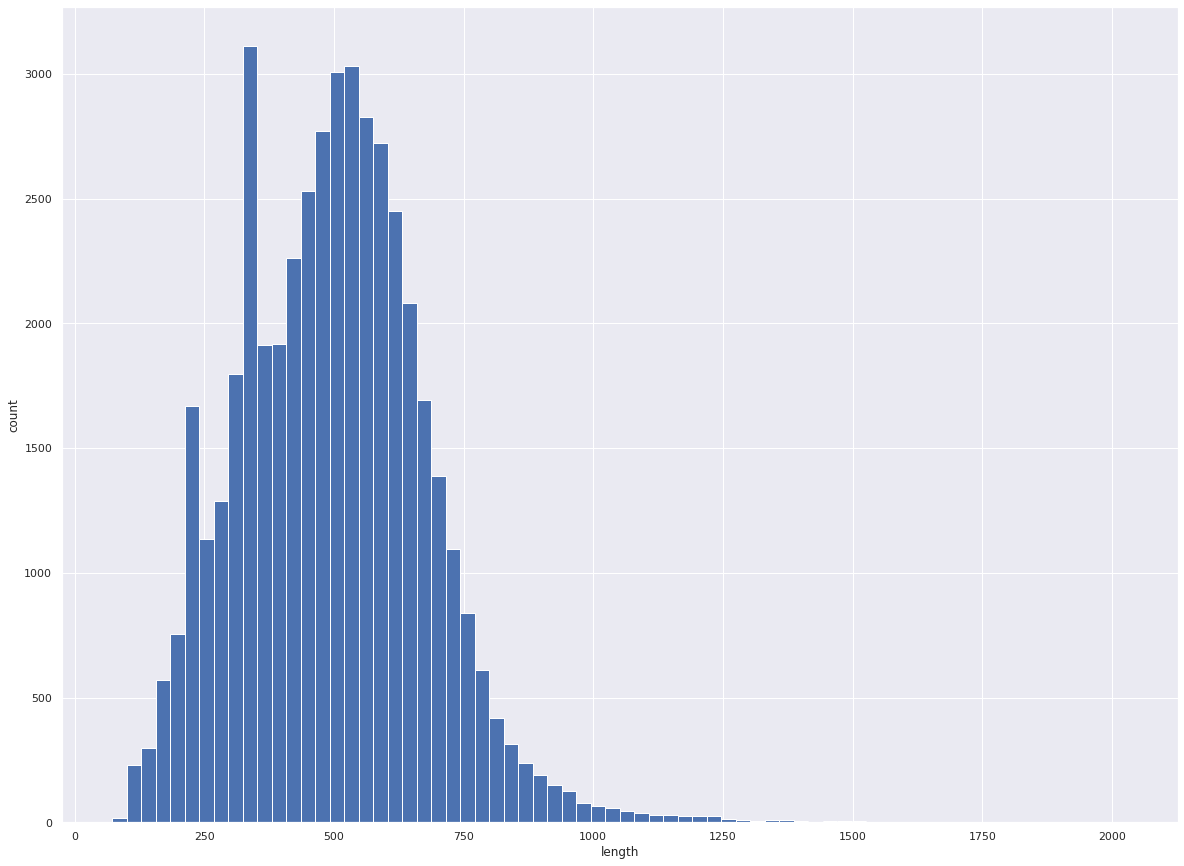

In [ ]:
sns.set()
_ = plt.hist(data['news_length'],bins=70)
_ = plt.xlabel("length")
_ = plt.ylabel("count")
plt.show()


1. WORLD



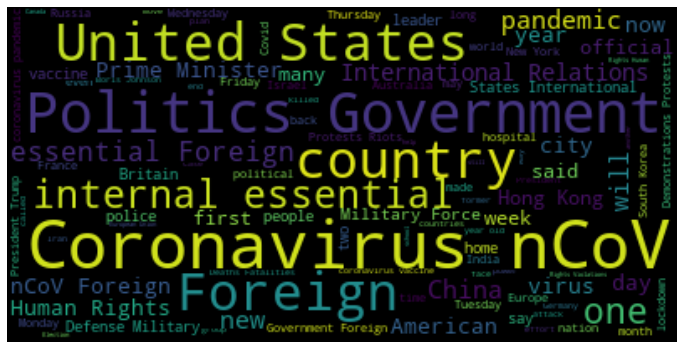


2. U.S.



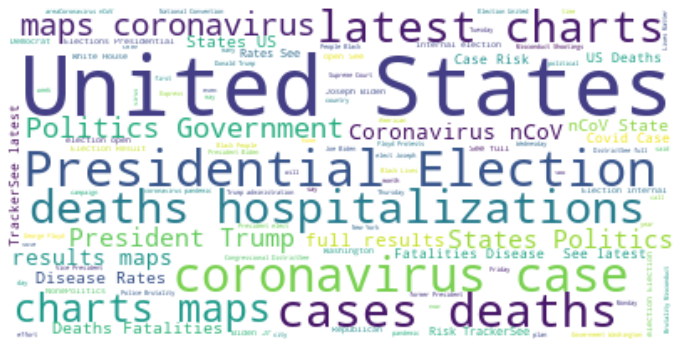


3. ARTS



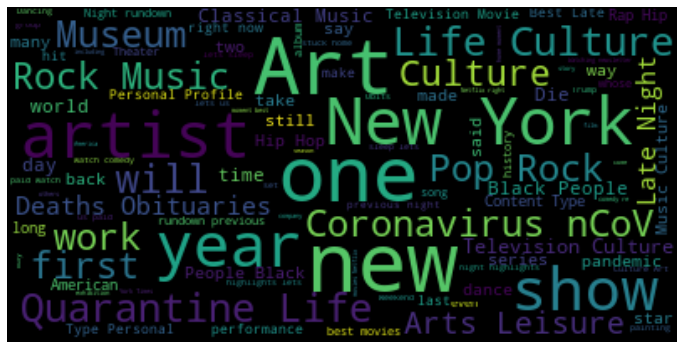


4. MAGAZINE



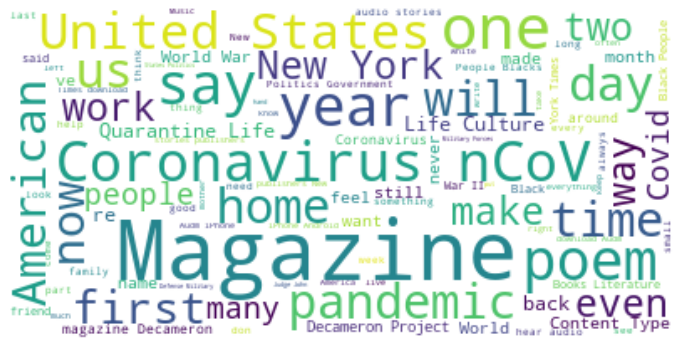


5. BRIEFING



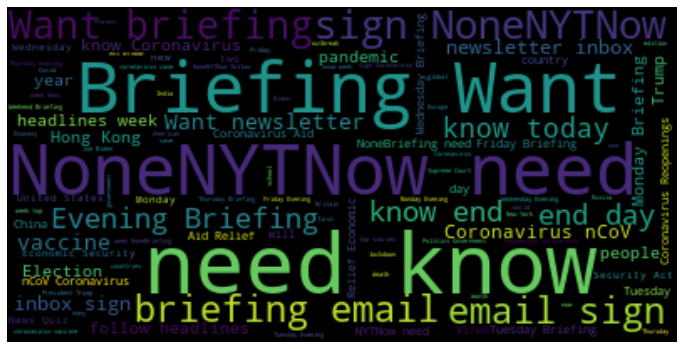


6. NEW YORK



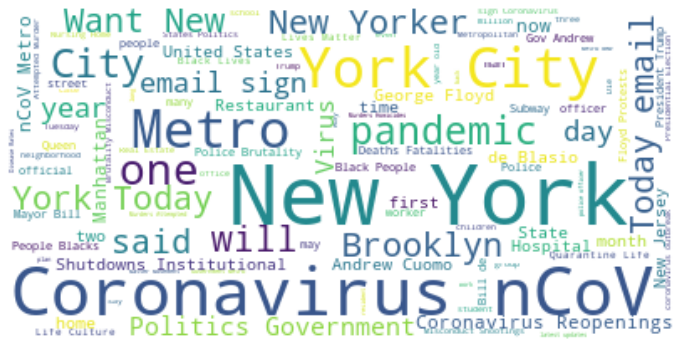


7. BUSINESS DAY



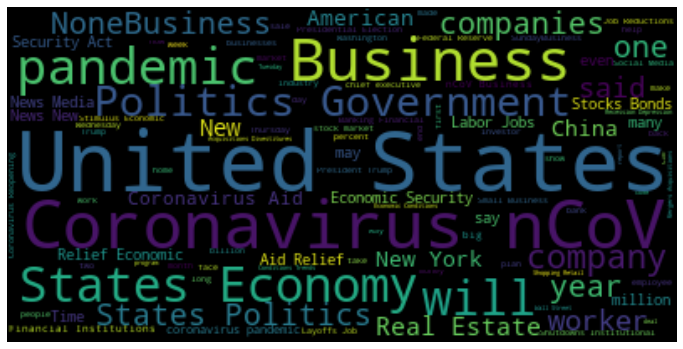


8. THE LEARNING NETWORK



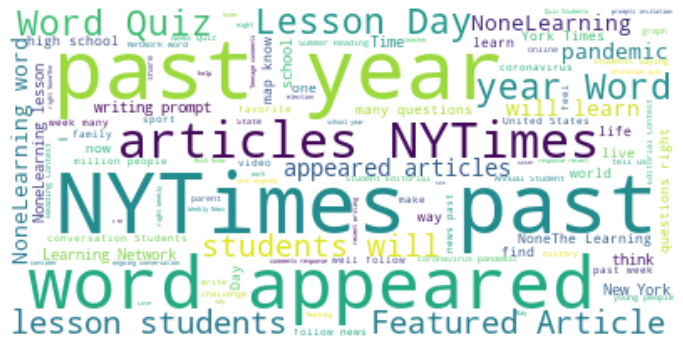


9. BOOKS



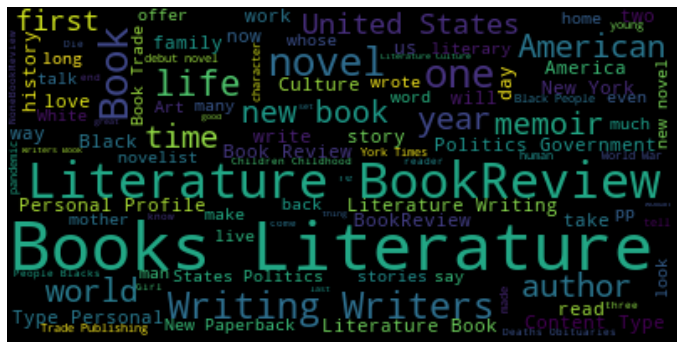


10. STYLE



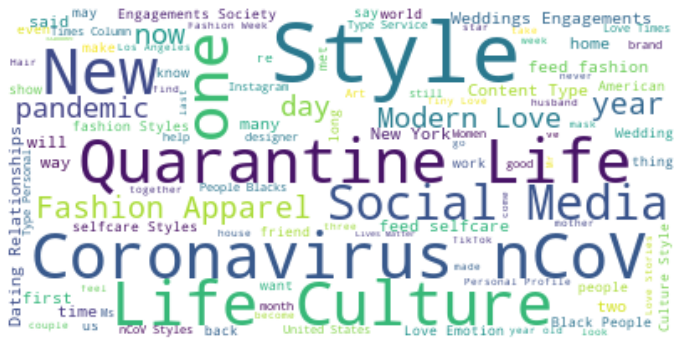


11. OPINION



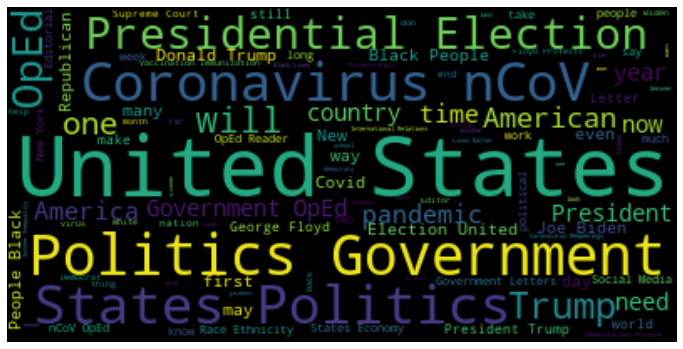


12. PARENTING



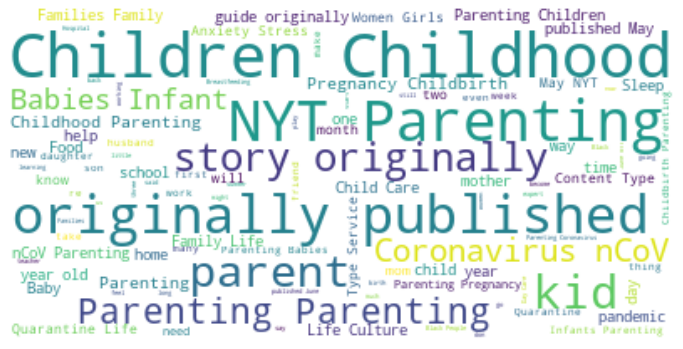


13. REAL ESTATE



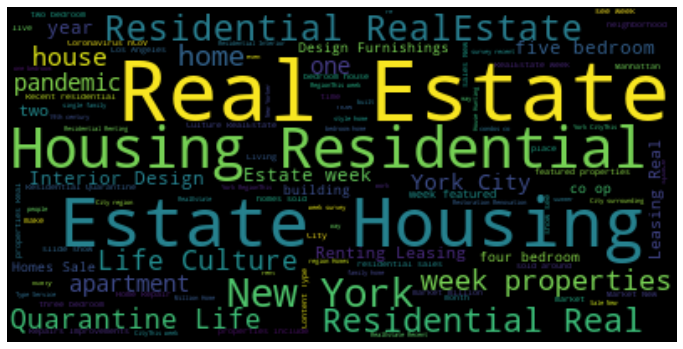


14. TECHNOLOGY



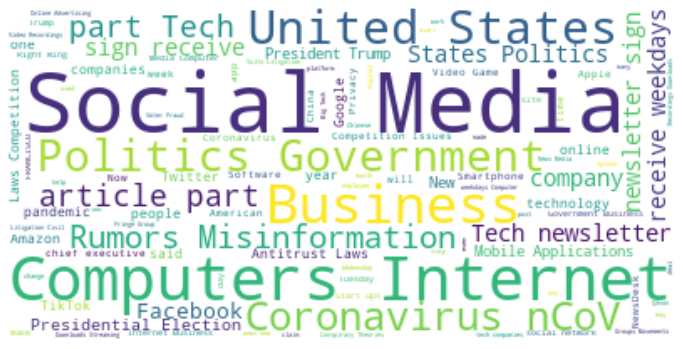


15. HEALTH



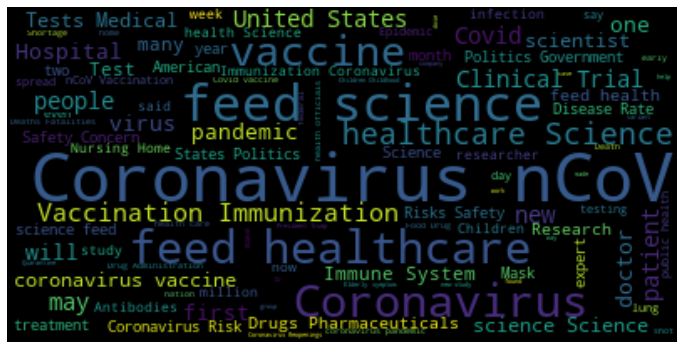


16. SPORTS



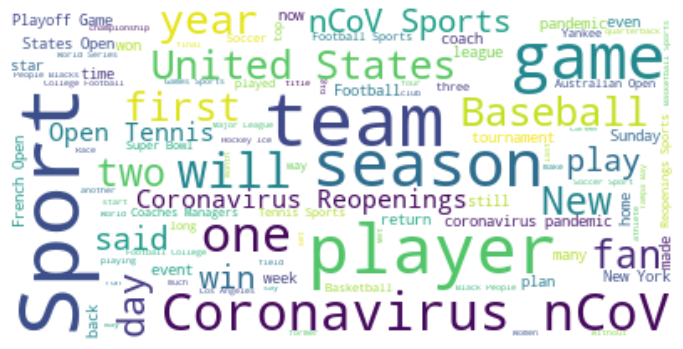


17. MOVIES



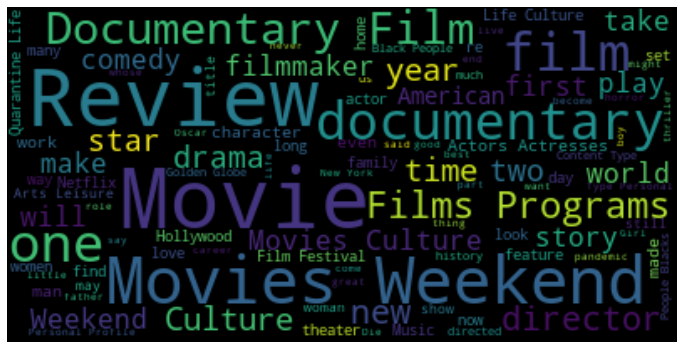


18. FOOD



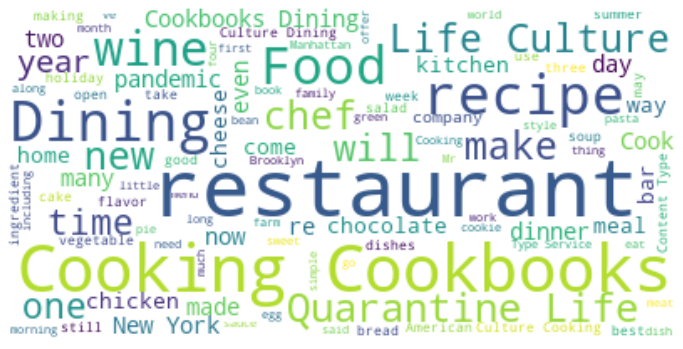

In [ ]:
categories = data['section'].unique()
i = 1
for category in categories:
  subset = data[data.section == category]
  sns.set(rc={'figure.figsize':(12,10)})
  text = subset.abstract.values + subset.headline.values + subset.lead_paragraph.values + subset.keywords.values + subset.news_desk.values
  word = ' '.join(text)
  print('\n' + str(i) + '. ' + category.upper() + '\n')
  if (i % 2 == 0):
    word_cloud(word,'white')
  else:
    word_cloud(word,'black')
  i = i + 1

In [ ]:
data['parsed_text'] = data['text'].apply(preprocess_text)
data['parsed_text'] = data['parsed_text'].apply(tokenize_stopwords)
data.head()

headline  ...                                        parsed_text
0  Human Rights Group Says Two U.S. Strikes Kille...  ...  human rights group says two us strikes killed ...
1  ‘Never Thought I Would Need It’: Americans Put...  ...  never thought would need americans put pride a...
2  $30 Million in Illegal Drugs Seized From Cross...  ...  30 million illegal drugs seized crossborder tu...
3  As Furloughs Grow, Kennedy Center Defends Use ...  ...  furloughs grow kennedy center defends use 25 m...
6  This Broccoli-Dill Pasta Has a Hippie Twist. Y...  ...  broccolidill pasta hippie twist kids love ita ...

[5 rows x 14 columns]

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['section_encoded'] = label_encoder.fit_transform(data['section'])
data

headline  ...                                        parsed_text
0      Human Rights Group Says Two U.S. Strikes Kille...  ...  human rights group says two us strikes killed ...
1      ‘Never Thought I Would Need It’: Americans Put...  ...  never thought would need americans put pride a...
2      $30 Million in Illegal Drugs Seized From Cross...  ...  30 million illegal drugs seized crossborder tu...
3      As Furloughs Grow, Kennedy Center Defends Use ...  ...  furloughs grow kennedy center defends use 25 m...
6      This Broccoli-Dill Pasta Has a Hippie Twist. Y...  ...  broccolidill pasta hippie twist kids love ita ...
...                                                  ...  ...                                                ...
55116  Typhoon Goni Leaves Philippines After Only Gra...  ...  typhoon goni leaves philippines grazing manila...
55118  Trump Camp Uses Online Gimmick to Fuel Donatio...  ...  trump camp uses online gimmick fuel donations ...
55119  George Shultz Speaks Out for Renewing U.S. Lea...  ...  george shultz speaks renewing us leadership ov...
55120  Police in North Carolina use a chemical spray ...  ...  police north carolina use chemical spray dispe...
55121  Stanford Study Seeks to Quantify Infections St...  ...  stanford study seeks quantify infections stemm...

[45961 rows x 14 columns]

In [ ]:
#splitting data into test & train
X_train, X_test, y_train,y_test = train_test_split(data['parsed_text'],data['section_encoded'],test_size = 0.2,random_state=8)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(77964,)
(77964,)
(19492,)
(19492,)


In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 3000

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range = ngram_range,
                        stop_words = None,
                        lowercase = False,
                        max_df = max_df,
                        min_df = min_df,
                        max_features = max_features,
                        norm = 'l2',
                        sublinear_tf = True
                        )
train_features = tfidf.fit_transform(X_train).toarray()
train_label = y_train

test_features = tfidf.transform(X_test).toarray()
test_label = y_test

In [ ]:
print(test_label.shape)
print(train_label.shape)
print(train_features.shape)
print(test_features.shape)


(9193,)
(36768,)
(36768, 3000)
(9193, 3000)


# Implementing the machine learning model

In [ ]:
model = RandomForestClassifier()
model.fit(train_features,train_label)
predictions = model.predict(test_features)
print(accuracy_score(test_label,predictions))
print(classification_report(test_label,predictions))

0.7047753725660829
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       663
           1       0.77      0.73      0.75       406
           2       0.97      0.81      0.89       189
           3       0.61      0.55      0.58       710
           4       0.72      0.72      0.72       215
           5       0.65      0.31      0.42       196
           6       0.72      0.24      0.37       139
           7       0.72      0.85      0.78       238
           8       0.63      0.63      0.63       421
           9       0.59      0.37      0.46       891
          10       0.80      0.68      0.73       143
          11       0.89      0.97      0.93       230
          12       0.82      0.88      0.85       508
          13       0.66      0.29      0.40       283
          14       0.88      0.34      0.49       204
          15       0.90      0.70      0.79       155
          16       0.71      0.90      0.79      2675
        

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features,train_label)
predictions = model.predict(test_features)
print(accuracy_score(test_label,predictions))
print(classification_report(test_label,predictions))
print(predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7550310018492331
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       663
           1       0.87      0.75      0.80       406
           2       0.96      0.80      0.88       189
           3       0.67      0.66      0.66       710
           4       0.80      0.77      0.78       215
           5       0.65      0.45      0.53       196
           6       0.68      0.23      0.34       139
           7       0.83      0.81      0.82       238
           8       0.74      0.68      0.71       421
           9       0.59      0.56      0.58       891
          10       0.83      0.69      0.76       143
          11       0.92      0.95      0.93       230
          12       0.90      0.88      0.89       508
          13       0.60      0.40      0.48       283
          14       0.75      0.58      0.65       204
          15       0.96      0.75      0.84       155
          16       0.78      0.90      0.84      2675
        

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_features,train_label)
predictions = model.predict(test_features)
print(accuracy_score(test_label,predictions))
print(classification_report(test_label,predictions))

0.5778309583378658
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       663
           1       0.15      0.83      0.26       406
           2       0.96      0.76      0.85       189
           3       0.82      0.40      0.54       710
           4       0.92      0.46      0.61       215
           5       0.64      0.23      0.34       196
           6       0.20      0.30      0.24       139
           7       0.83      0.29      0.42       238
           8       0.76      0.36      0.49       421
           9       0.69      0.23      0.35       891
          10       0.95      0.53      0.68       143
          11       0.81      0.87      0.84       230
          12       0.93      0.66      0.77       508
          13       0.86      0.22      0.35       283
          14       0.74      0.37      0.49       204
          15       0.93      0.72      0.81       155
          16       0.67      0.86      0.76      2675
        

In [ ]:
print(predictions)

[ 2 16  0 ... 13 11 16]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_features,train_label)
predictions = model.predict(test_features)
print(accuracy_score(test_label,predictions))
print(classification_report(test_label,predictions))


0.5867507886435331
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       663
           1       0.63      0.65      0.64       406
           2       0.77      0.78      0.77       189
           3       0.44      0.42      0.43       710
           4       0.61      0.57      0.59       215
           5       0.30      0.24      0.27       196
           6       0.40      0.25      0.31       139
           7       0.71      0.69      0.70       238
           8       0.52      0.49      0.51       421
           9       0.37      0.38      0.38       891
          10       0.68      0.66      0.67       143
          11       0.91      0.92      0.91       230
          12       0.72      0.73      0.73       508
          13       0.33      0.27      0.30       283
          14       0.49      0.43      0.45       204
          15       0.68      0.66      0.67       155
          16       0.69      0.73      0.71      2675
        

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_features,train_label)
predictions = model.predict(test_features)
print(accuracy_score(test_label,predictions))
print(classification_report(test_label,predictions))
print(predictions)

0.373001196562602
              precision    recall  f1-score   support

           0       0.54      0.18      0.27       663
           1       0.34      0.36      0.35       406
           2       0.37      0.64      0.47       189
           3       0.42      0.30      0.35       710
           4       0.22      0.53      0.31       215
           5       0.16      0.43      0.23       196
           6       0.07      0.24      0.11       139
           7       0.18      0.63      0.28       238
           8       0.29      0.41      0.34       421
           9       0.37      0.15      0.22       891
          10       0.22      0.64      0.33       143
          11       0.41      0.69      0.51       230
          12       0.62      0.62      0.62       508
          13       0.12      0.17      0.14       283
          14       0.14      0.59      0.23       204
          15       0.38      0.64      0.48       155
          16       0.96      0.38      0.54      2675
         

# Tweepy

In [15]:
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import re
import nltk

In [16]:
consumer_key = 'khYitpDgJonkCE7IMgFDGIerQ'
consumer_secret = '1gfrS6A2nk5pgwrArWCHh6DjgnRaJ0bVUBwk30djObVSJMzhlI'
access_token = '2594292031-cjboHw22k9bbT7EoXLEbFWnQOIvpmhXpGT2j3xh'
access_token_secret = 'vUJcFMZKAEEx4JJEfJqQYjNfWiYc2PrMy3p6pYzozkOCF'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
auth_api = API(auth)

In [29]:
hashtags = []
mentions = []
urls = []
text = []
comment = 'nytimes'
tweet_count = 0
end_date = datetime.utcnow() - timedelta(days=120)
for status in Cursor(auth_api.user_timeline, id="nytimes", tweet_mode="extended").items():
  tweet_count += 1
  if status.full_text.startswith("RT"):
    text.append(status.retweeted_status.full_text)
  else:
    text.append(status.full_text)
  if hasattr(status, "entities"):
    entities = status.entities
    if "hashtags" in entities:
      for ent in entities["hashtags"]:
        if ent is not None:
          if "text" in ent:
            hashtag = ent["text"]
            if hashtag is not None:
              hashtags.append(hashtag)
    if "user_mentions" in entities:
      for ent in entities["user_mentions"]:
        if ent is not None:
          if "screen_name" in ent:
            name = ent["screen_name"]
            if name is not None:
              mentions.append(name)
    if "urls" in entities:
      for ent in entities["urls"]:
        if ent is not None:
          if "url" in ent:
            url = ent["expanded_url"]
            if url is not None:
              urls.append(url)
    if status.created_at < end_date:
      break

In [30]:
import numpy as np
import pandas as pd
from google.colab import files


print(text[0])
print("All done. Processed " + str(tweet_count) + " tweets.")

df = pd.DataFrame(data = text, columns=['tweepy_text'])
df.to_csv ('tweepy.csv', index = False, header = True)
files.download('tweepy.csv')

They argue about dishes. Toilet paper. Toothbrush hygiene. And of course the *way* they fight -- or “the most lesbian thing ever."

Did YOU TOO spend your quarantine sending the domestic disputes of @AbbyWambach &amp;  @GlennonDoyle to your partner????

https://t.co/qvZctUfkag
All done. Processed 1300 tweets.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>